In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fastai==2.0
!pip install -Uqq fastbook

     |████████████████████████████████| 350 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 1.2 MB 31.7 MB/s 
     |████████████████████████████████| 189 kB 33.9 MB/s 
     |████████████████████████████████| 48 kB 3.4 MB/s 
     |████████████████████████████████| 558 kB 42.6 MB/s 
     |████████████████████████████████| 51 kB 293 kB/s 
     |████████████████████████████████| 130 kB 48.5 MB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
url = search_images_ddg('cricket balls', max_images=5)
len(url),url[0]

(100,
 'https://sm.mashable.com/mashable_pk/photo/default/whatsapp-image-2020-07-14-at-123825-pm_228a.jpg')

In [ ]:
download_url(url[1],dest='images/cricketball.jpg')

Path('images/cricketball.jpg')

In [ ]:
ball_types = 'test_cricket','white_cricket','tennis'
path = Path('gdrive/MyDrive/Colab Notebooks/balls')

In [ ]:
#f not path.exists():
  #path.mkdir()
#for b in ball_types:
  #dest = path/b
  #dest.mkdir(exist_ok=True)
  #results = search_images_ddg(f'{b} balls images')
  #download_images(dest,urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#759) [Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000006.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000001.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000009.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000000.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000007.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000008.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000004.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000003.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000005.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000014.jpg')...]

In [ ]:
fns = get_image_files(path)
fns

(#759) [Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000006.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000001.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000009.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000000.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000007.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000008.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000004.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000003.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000005.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000014.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#3) [Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000154.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000172.jpg'),Path('gdrive/MyDrive/Colab Notebooks/balls/test_cricket/00000091.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
balls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = balls.dataloaders(path)

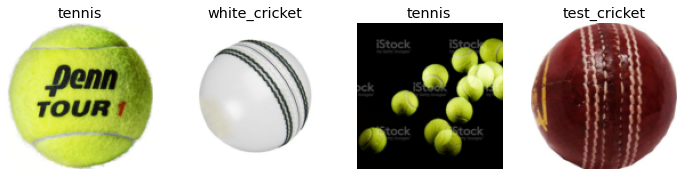

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
balls = balls.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = balls.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.120251,0.047596,0.013986,00:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.210944,0.033614,0.006993,00:25
1,0.151299,0.012661,0.000000,00:25
2,0.120245,0.016603,0.006993,00:25
3,0.092556,0.020661,0.006993,00:25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


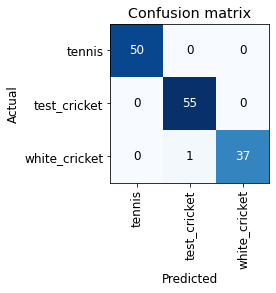

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

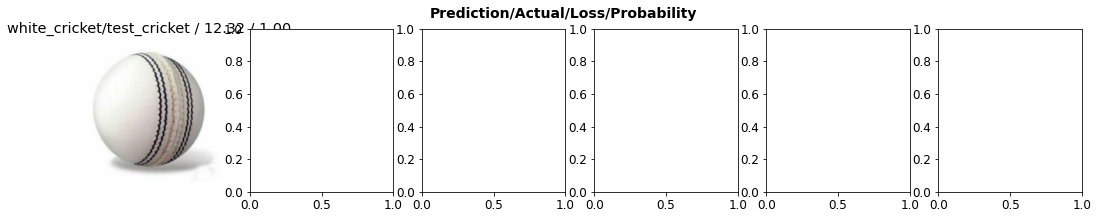

In [ ]:
interp.plot_top_losses(6, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change():
  f = cleaner.fns[idx]
  os.rename(f, f.parent/(f.parent.name+f.stem+f.suffix))
  shutil.move(str(f.parent/(f.parent.name+f.stem+f.suffix)), path/cat )

In [ ]:
learn.export()